# Clasificación

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('/dbfs/FileStore/tables/titanic_train.csv')
train.head()

Out[2]:

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
t=train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
d=train.describe()
d

Out[4]:

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA y Gráficos

Out[5]:

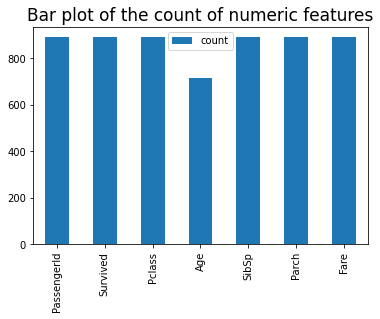

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

In [0]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

**Balance de los datos **

Out[5]:

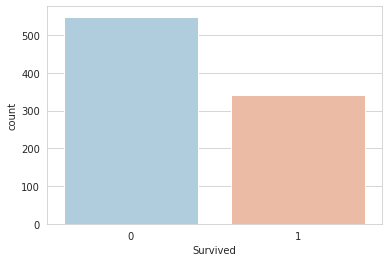

<matplotlib.axes._subplots.AxesSubplot at 0x7f19500d8250>

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

**Hay patrones de supervivencia en base al genero?**

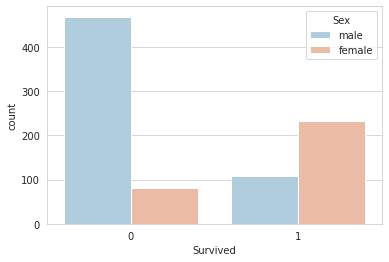

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r');

**Algún patron en base a la clase de los pasajeros?**

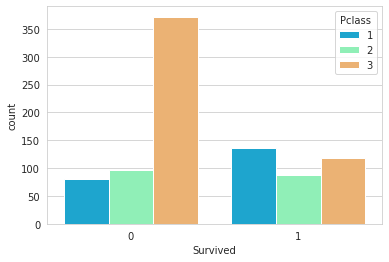

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow');

**Porcentaje de pasajeros que sobrevivieron en cada clase**

Out[9]:

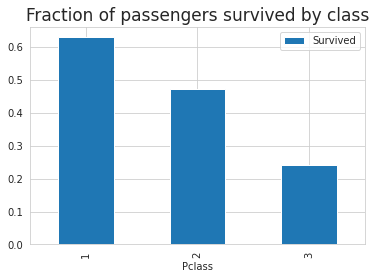

Text(0.5, 1.0, 'Fraction of passengers survived by class')

In [0]:
f_class_survived=train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Fraction of passengers survived by class",fontsize=17)

**Distribución edad de los pasajeros?**

Out[98]: <matplotlib.axes._subplots.AxesSubplot at 0x2acbc925438>

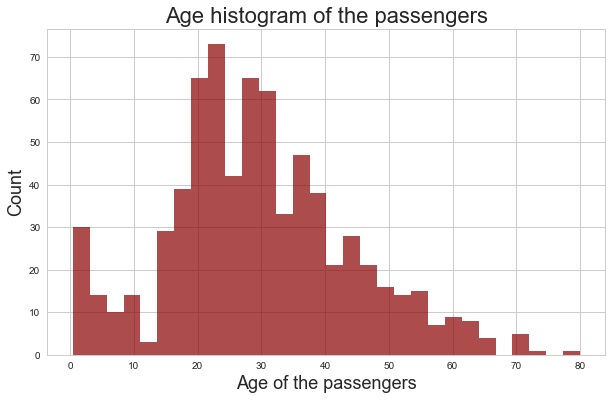

In [0]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

**Distribución de la edad a través de las clases de pasajeros?**

Out[10]:

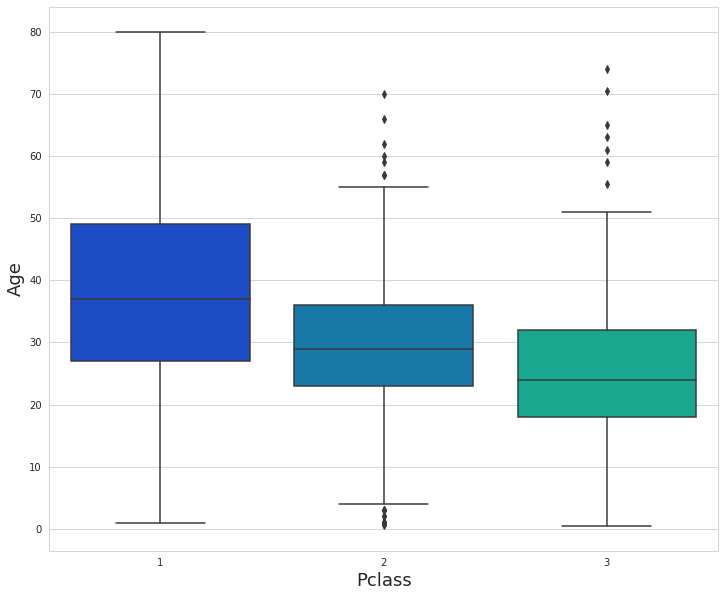

<matplotlib.axes._subplots.AxesSubplot at 0x7f192715f4f0>

In [0]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Out[22]:

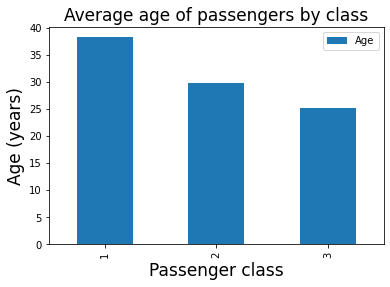

Text(0.5, 0, 'Passenger class')

In [0]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

## Data wrangling
* Imputando edad por promedio
* Eliminando caracteristicas irrelevantes
* Procesando los datos

In [0]:
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

Out[24]:

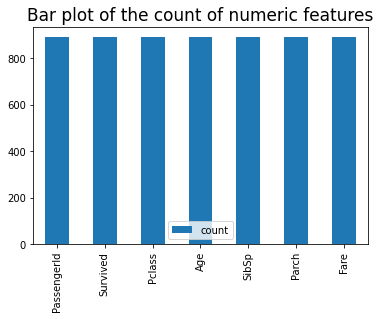

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

In [0]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
d=train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [0]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 <command-2484743032544420> in <module> 
 ----> 1 train . drop ( 'Cabin' , axis = 1 , inplace = True ) 
 2 train . dropna ( inplace = True ) 
 3 train . head ( ) 

 /databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in drop (self, labels, axis, index, columns, level, inplace, errors) 
 4165 weight 1.0 0.8 
 4166 """
 -> 4167 return super().drop(
 4168 labels = labels , 
 4169 axis = axis , 

 /databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in drop (self, labels, axis, index, columns, level, inplace, errors) 
 3887 for axis , labels in axes . items ( ) : 
 3888 if labels is not None : 
 -> 3889 obj = obj . _drop_axis ( labels , axis , level = level , errors = errors ) 
 3890 
 3891 if inplace : 

 /databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in _drop_axis (self, labels, axis, level, errors) 
 3921 new_axis = axis . drop ( labels , level = level , errors = errors ) 
 3922 else : 
 -> 3923 new_axis = axis . drop ( labels , errors = errors ) 
 3924 result = self . reindex ( ** { axis_name : new_axis } ) 
 3925 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in drop (self, labels, errors) 
 5285 if mask . any ( ) : 
 5286 if errors != "ignore" : 
 -> 5287 raise KeyError ( f"{labels[mask]} not found in axis" ) 
 5288 indexer = indexer [ ~ mask ] 
 5289 return self . delete ( indexer ) 

 KeyError : "['Cabin'] not found in axis"

### Eliminando caracteristicas irrelenvantes como 'Name', 'Ticket', 'PassengerId'

In [0]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
train.head()

Out[28]:

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Dummies

In [0]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [0]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

Out[32]:

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Ajuste Regresión Logistica

In [0]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_val_set, y_test_val_set = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], train_size=0.90, 
                                                    random_state=111)

In [0]:
print(train.shape)
print(X_train_1.shape)
print(X_test_1.shape)

(889, 9)
(800, 8)
(89, 8)

In [0]:
print(train.shape)
print(y_val_set.shape)
print(y_test_val_set.shape)

(889, 9)
(800,)
(89,)

In [0]:
#100%

#10% Conjunto de validación 
#90% Entrenamiento 

In [0]:
#90%
# 70% Entrenamiento 30% test
X_train, X_test, y_train, y_test = train_test_split(X_train_1, 
                                                    y_val_set, train_size=0.70, 
                                                    random_state=111)

In [0]:
print(train.shape)
print(X_train.shape)
print(X_test.shape)

(889, 9)
(560, 8)
(240, 8)

In [0]:
print(X_test.shape)

(240, 8)

In [0]:
print(X_train.shape)
print(X_test.shape)

(560, 8)
(240, 8)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [0]:
X_train

Out[74]:

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
298,1,38.233441,0,0,30.5000,1,0,1
656,3,25.140620,0,0,7.8958,1,0,1
171,3,4.000000,4,1,29.1250,1,1,0
585,1,18.000000,0,2,79.6500,0,0,1
77,3,25.140620,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
354,3,25.140620,0,0,7.2250,1,0,0
786,3,18.000000,0,0,7.4958,0,0,1
463,2,48.000000,0,0,13.0000,1,0,1
324,3,25.140620,8,2,69.5500,1,0,1


In [0]:
def normalize(x):
  A = x - x.min() / (x.min() - x.max())
  return A

In [0]:
X_train_n = normalize(X_train)

In [0]:
lr = LogisticRegression(max_iter=500)

In [0]:
X_train

Out[78]:

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
298,1,38.233441,0,0,30.5000,1,0,1
656,3,25.140620,0,0,7.8958,1,0,1
171,3,4.000000,4,1,29.1250,1,1,0
585,1,18.000000,0,2,79.6500,0,0,1
77,3,25.140620,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
354,3,25.140620,0,0,7.2250,1,0,0
786,3,18.000000,0,0,7.4958,0,0,1
463,2,48.000000,0,0,13.0000,1,0,1
324,3,25.140620,8,2,69.5500,1,0,1


In [0]:
X_train_n

Out[79]:

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
298,1.5,38.241887,0.0,0.0,30.5000,1.0,0.0,1.0
656,3.5,25.149065,0.0,0.0,7.8958,1.0,0.0,1.0
171,3.5,4.008446,4.0,1.0,29.1250,1.0,1.0,0.0
585,1.5,18.008446,0.0,2.0,79.6500,0.0,0.0,1.0
77,3.5,25.149065,0.0,0.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
354,3.5,25.149065,0.0,0.0,7.2250,1.0,0.0,0.0
786,3.5,18.008446,0.0,0.0,7.4958,0.0,0.0,1.0
463,2.5,48.008446,0.0,0.0,13.0000,1.0,0.0,1.0
324,3.5,25.149065,8.0,2.0,69.5500,1.0,0.0,1.0


In [0]:
X_test_n = normalize(X_test)

In [0]:
lr_model= lr.fit(X_train_n,y_train)

In [0]:
lr_pred =  lr_model.predict(X_test_n)

In [0]:
confusion_matrix(y_test,lr_pred)

Out[83]: array([[145, 14],
 [ 27, 54]])

In [0]:
print('Logistic Regression')
print(classification_report(y_test,lr_pred))

Logistic Regression
 precision recall f1-score support

 0 0.84 0.91 0.88 159
 1 0.79 0.67 0.72 81

 accuracy 0.83 240
 macro avg 0.82 0.79 0.80 240
weighted avg 0.83 0.83 0.83 240

### F1-score como función de regularización Parametro de penalidad

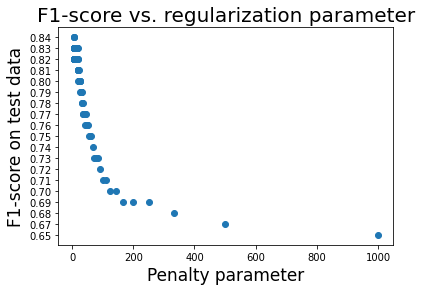

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu
for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

In [0]:
X_train.min()

Out[85]: Pclass 1.00
Age 0.67
SibSp 0.00
Parch 0.00
Fare 0.00
male 0.00
Q 0.00
S 0.00
dtype: float64

In [0]:
X_train.max()

Out[86]: Pclass 3.0000
Age 80.0000
SibSp 8.0000
Parch 6.0000
Fare 512.3292
male 1.0000
Q 1.0000
S 1.0000
dtype: float64

In [0]:
 X_test_1.columns


Out[99]: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [0]:
X_test_1['minpclas'] = 1.00
X_test_1['maxpclass'] = 3.00

In [0]:
X_test_1['Pclass'] =  X_test_1['Pclass']- X_test_1['minpclas'] / 2 

In [0]:
X_test_1['Pclass'] 

Out[104]: 374 2.5
212 2.5
259 1.5
584 2.5
508 2.5
 ... 
120 1.5
841 1.5
5 2.5
658 1.5
443 1.5
Name: Pclass, Length: 89, dtype: float64